In [1]:
from scipy.stats import skewnorm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def apply_noise(matrix):
    length = min(matrix.shape[0], matrix.shape[1])
    shift_num = np.random.randint(6, 8, 1)[0]//2*2
    shifts_a = np.random.randint(0, length,size=shift_num)
    shifts_a = shifts_a.reshape(shift_num//2, 2)
    shifts_b = np.random.randint(0,length,size=shift_num)
    shifts_b = shifts_b.reshape(shift_num//2, 2)

    for a, b in zip(shifts_a, shifts_b):
        matrix[a[0], a[1]], matrix[b[0], b[1]] = matrix[b[0], b[1]], matrix[a[0], a[1]]
    return matrix

In [3]:
def make_sample(sample_type):
    matrix = np.zeros((21,21))

    if sample_type=='++':
        left_up = skewnorm.rvs(5, size=110, loc=1, scale=0.5).reshape(11,10)
        left_down = skewnorm.rvs(-6, size=110, loc=2.8, scale=0.5).reshape(10,11)
        right_up = skewnorm.rvs(-6, size=110, loc=2.8, scale=0.5).reshape(10,11)
        right_down = skewnorm.rvs(5, size=110, loc=1, scale=0.5).reshape(11,10)
    if sample_type=='--':
        left_up = skewnorm.rvs(5, size=110, loc=1, scale=0.5).reshape(11,10)
        left_down = skewnorm.rvs(-6, size=110, loc=2.8, scale=0.5).reshape(10,11)
        right_up = skewnorm.rvs(5, size=110, loc=1, scale=0.5).reshape(10,11)
        right_down = skewnorm.rvs(5, size=110, loc=1, scale=0.5).reshape(11,10)
    if sample_type=='-+':
        left_up = skewnorm.rvs(-6, size=110, loc=2.8, scale=0.5).reshape(11,10)
        left_down = skewnorm.rvs(5, size=110, loc=1, scale=0.5).reshape(10,11)
        right_up = skewnorm.rvs(5, size=110, loc=1, scale=0.5).reshape(10,11)
        right_down = skewnorm.rvs(5, size=110, loc=1, scale=0.5).reshape(11,10)
    if sample_type=='+-':
        left_up = skewnorm.rvs(5, size=110, loc=1, scale=0.5).reshape(11,10)
        left_down = skewnorm.rvs(5, size=110, loc=1, scale=0.5).reshape(10,11)
        right_up = skewnorm.rvs(5, size=110, loc=1, scale=0.5).reshape(10,11)
        right_down = skewnorm.rvs(-6, size=110, loc=2.8, scale=0.5).reshape(11,10)

    if sample_type=='negative':
        matrix = skewnorm.rvs(4, size=441, loc=0, scale=0.2).reshape(21,21)
        return matrix

    left_up.sort(axis=0)
    left_up.sort(axis=1)
    left_down.sort(axis=0)
    left_down.sort(axis=1)
    right_up.sort(axis=0)
    right_up.sort(axis=1)
    right_down.sort(axis=0)
    right_down.sort(axis=1)

    left_up = apply_noise(left_up)
    left_down = apply_noise(left_down)
    right_down = apply_noise(right_down)
    right_up = apply_noise(right_up)

    matrix[0:11,0:10] = left_up
    matrix[11:21, 0:11] = np.flip(left_down, axis=0)
    matrix[0:10, 10:21] = np.flip(right_up, axis=1)
    matrix[10:21, 11:21] = np.flip(np.flip(right_down, axis=0), axis=1)
    matrix[10,10] = skewnorm.rvs(-6, size=1, loc=2.8, scale=0.5)

    return matrix

In [155]:
for i in range(300):
    matrix_plus_minus = make_sample('negative')
    plt.imsave(f'images/negative/{i}.png', matrix_plus_minus, cmap='gray')

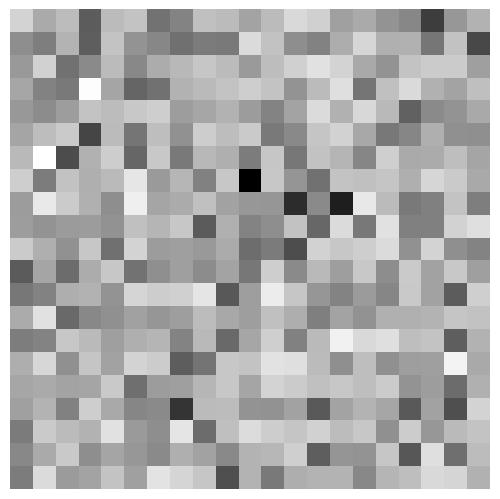

<Figure size 9.1875x9.1875 with 0 Axes>

In [5]:
matrix_plus_minus = make_sample('negative')
fig = plt.figure(frameon=False)
plt.figure(figsize=(2.1, 2.1), dpi=4.375)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
im = ax.matshow(matrix_plus_minus, cmap='gray_r')
plt.imsave('DR.png', matrix_plus_minus, cmap='gray')
#fig.savefig(f'images/negative/{i}', dpi=4.375, bbox_inches='tight',  pad_inches=0)

In [1]:
from Bio import SeqIO

records = {}
with open("data/an_gambiae_zanu_m.fasta") as handle:
    for record in (SeqIO.parse(handle, "fasta")):
        records[record.id] = record
records

{'X': SeqRecord(seq=Seq('CAGCAGCTGCAGCTACCAGCAACCTGAAAAAAACAAAACAAAACACTTTAAAAT...GAA'), id='X', name='X', description='X', dbxrefs=[]),
 '2R': SeqRecord(seq=Seq('CTTGAAATTTGATGTTGAATTTTGTTGCCATCTATTATCGTTGTTACGGCCATG...ATG'), id='2R', name='2R', description='2R', dbxrefs=[]),
 '2L': SeqRecord(seq=Seq('TTCAGTTACGTATTGCTAATCAACCGTCGGTATTCTATACGCGTACGATCCAGG...AAC'), id='2L', name='2L', description='2L', dbxrefs=[]),
 '3R': SeqRecord(seq=Seq('ATATTAATCAGCTTTTAGTAGCTACTGTATTAAGTCCGCAAAACTATTTGGTTT...GAA'), id='3R', name='3R', description='3R', dbxrefs=[]),
 '3L': SeqRecord(seq=Seq('ATCTCGGCATCATCTACCCCATATACAAAGGAGACAGGTTGGACTGCAACAACT...AAC'), id='3L', name='3L', description='3L', dbxrefs=[]),
 'scaffold_9': SeqRecord(seq=Seq('CAAATCAAAGCCCTGGGACACAATAACAAGGATCTTGGCGATGTAAAAGTTTCA...AGT'), id='scaffold_9', name='scaffold_9', description='scaffold_9', dbxrefs=[]),
 'scaffold_10': SeqRecord(seq=Seq('GCACTTTCCTCTAACGCAAAGTACTGCCGCATGGTCTCGTTCAGTTCTTGATCA...TGT'), id='scaffold_10', name='sca

In [7]:
records_new = {}
records_new['X'] = records['X']
chr2 = records['2L'].seq + 1000*"N" + records['2R'].seq
chr3 = records['3L'].seq + 1000*"N" + records['3R'].seq
records_new['chr2'] = SeqIO.SeqRecord(chr2,'chr2','chr2','chr2')
records_new['chr3'] = SeqIO.SeqRecord(chr3,'chr3','chr3','chr3')

In [13]:
import random

def make_deletion(seq, end):
    length = 1000000#random.randint(1000, 5000)
    start = end - length
    if start <=0:
        return False
    seq = seq[:start] + seq[end:]

    return seq, start, start

def make_duplication(seq, end):
    length = 1000000#random.randint(1000, 5000)
    start = end - length
    if start <=0:
        return False
    seq = seq[:end] + seq[start:end] + seq[end:]

    return seq, end, end+length

def make_duplication_reverse(seq, end):
    length = 1000000#random.randint(1000, 5000)
    start = end - length
    if start <=0:
        return False
    seq = seq[:start] + seq[start:end] + seq[start:end].reverse_complement() + seq[end:]
    return seq, end, end+length

def make_reverse(seq, end):
    length = 1000000#random.randint(1000, 5000)
    start = end - length
    if start <=0:
        return False
    seq = seq[:start] + seq[start:end].reverse_complement() + seq[end:]

    return seq, start, end

def make_translocation(seq, end, reverse=False):
    length = 10000000#random.randint(20000, 100000)
    start = end - length

    if start <=0:
        return False


    move_length = 1000000#random.randint(1000, 5000)
    moving_start = random.randint(start + random.randint(10, 100), end - random.randint(10, 100)-move_length)
    move_seq = seq[moving_start:moving_start+move_length]
    if reverse:
        move_seq = move_seq.reverse_complement()
    if moving_start - start > end - moving_start+move_length:
        move_point = random.randint(start+1, moving_start)
        seq = seq[:move_point] + move_seq + seq[move_point:moving_start] + seq[moving_start+move_length:]
        return seq,(moving_start, moving_start+move_length) , (moving_start+move_length,move_point+move_length), (moving_start, move_point), start
    else:
        move_point = random.randint(moving_start+move_length+1, end)
        seq = seq[:moving_start] + seq[moving_start+move_length:move_point] + move_seq + seq[move_point:]

        return seq, (moving_start, move_point-move_length), (moving_start, move_point), (move_point-move_length, move_point), start


def make_translocation_reverse(seq, end):
    length = 10000000#random.randint(20000, 100000)
    start = end - length

    if start <=0:
        return False


    move_length = 1000000#random.randint(1000, 5000)
    moving_start = random.randint(start + random.randint(10, 100), end - random.randint(10, 100)-move_length)
    move_seq = seq[moving_start:moving_start+move_length].reverse_complement()
    if moving_start - start > end - moving_start+move_length:
        move_point = random.randint(start+1, moving_start)
        seq = seq[:move_point] + move_seq + seq[move_point:moving_start] + seq[moving_start+move_length:]
        return seq, move_point, moving_start, move_point+move_length, moving_start, start
    else:
        move_point = random.randint(moving_start+move_length+1, end)
        seq = seq[:moving_start] + seq[moving_start+move_length:move_point] + move_seq + seq[move_point:]

        return seq, (moving_start, moving_start+move_length), (moving_start, move_point), (moving_start+move_length, move_point+move_length), start

record = records_new['X']
seq = record.seq

with open('data/transitions.csv', mode='w') as output:
    output.write(f'label,start,end\n')
    end = len(seq) - 1
    for i in range(3):
        '''
        end -= random.randint(1000, 10000)
        seq, start, end = make_deletion(seq, end)
        output.write(f'+-, {start}, {end}\n')
        start, end = end, start

        end -= random.randint(10000, 10000)
        seq, start, end = make_duplication(seq, end)
        output.write(f'-+, {start}, {end}\n')
        start, end = end, start

        end -= random.randint(1000, 10000)
        seq, start, end = make_duplication_reverse(seq, end)
        output.write(f'--, {start}, {end}\n')
        start, end = end, start

        end -= random.randint(1000, 10000)
        seq, start, end = make_reverse(seq, end)
        output.write(f'++, {start}, {end}\n')
        '''
        end -= random.randint(1000, 10000)
        seq, plus_minus, minus_plus_1, minus_plus_2, end = make_translocation(seq, end)
        output.write(f'+-,{plus_minus[0]},{plus_minus[1]}\n')
        output.write(f'-+,{minus_plus_1[0]},{minus_plus_1[1]}\n')
        output.write(f'-+,{minus_plus_2[0]},{minus_plus_2[1]}\n')

        end -= random.randint(1000, 10000)
        seq, plus_minus, minus_plus_1, minus_plus_2, end = make_translocation(seq, end, True)
        output.write(f'+-,{plus_minus[0]},{plus_minus[1]}\n')
        output.write(f'-+, {minus_plus_1[0]},{minus_plus_1[1]}\n')
        output.write(f'-+,{minus_plus_2[0]},{minus_plus_2[1]}\n')

In [82]:
def make_duplication(seq):
    start = 5#random.randint(0, len(seq))
    end = start + 5#max(start + random.randint(1000, 5000), len(seq) - 1)
    seq = seq[:end] + seq[start:end] + seq[end:]
    return seq, end

print(record.seq[0:20])
print(make_duplication(record.seq[0:20]))

CAGCAGCTGCAGCTACCAGC
CAGCAGCTGC
GCTGC
AGCTACCAGC
(Seq('CAGCAGCTGCGCTGCAGCTACCAGC'), 10)


In [14]:
with open('data/rearrangement_x_trans.fasta', mode='w') as output:
    output.write(f'>X\n')
    output.write(str(seq))
    output.write('\n')

In [5]:
len(records_new['X'].seq)/50000

1219.3482

In [ ]:
60950000